##**Part 1 - Data gathering and preprocessing**

###**Libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



```
!cp /content/Google_Stock_Price_Test.csv drive/My\ Drive/Colab\ Notebooks
!cp /content/Google_Stock_Price_Train.csv drive/My\ Drive/Colab\ Notebooks
```



In [0]:
# Importing the training set
dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values #open price columns

###**Feature Scaling**

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_data_scaled = sc.fit_transform(training_set)

In [0]:
#creating a data structure with 60 timesteps and 1 output
x_train = [] #60 timesteps
y_train = [] #1 output to predict
for i in range(60,len(train_data_scaled)):
    x_train.append(train_data_scaled[i-60:i,0])
    y_train.append(train_data_scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

>**Input shape**3D tensor with shape (batch_size, timesteps, input_dim).

>>**batch_size** = total number of records/rows=x_train.shape[0].

>>**timesteps** = 60/total number of 'features'/columns=x_train.shape[1].

>>**input_dim**= 1

>We use np.reshape() to make the x_train fit the RNN Input shape requirement

##**Part 2 - Building the RNN**

In [0]:
#Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [0]:
#initialising the RNN
regressor = Sequential()

#Adding the first LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(rate = 0.2))


In [15]:
x_train.shape[1]

60

In [0]:
#Adding the second LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate = 0.2))

In [0]:
#Adding the third LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate = 0.2))

In [0]:
#Adding the fourth LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate = 0.2))

In [0]:
#Adding the output layer
regressor.add(Dense(units=1))

In [12]:
#compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
#fitting the RNN to the training set
regressor.fit(x_train, y_train, epochs=50, batch_size = 32)

Epoch 1/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0037
Epoch 2/50
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0037
Epoch 3/50
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0033
Epoch 4/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0032
Epoch 5/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0034
Epoch 6/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0032
Epoch 7/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0033
Epoch 8/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0030
Epoch 9/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0029
Epoch 10/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0030
Epoch 11/50
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0030
Epoch 12/50
1198/1198 [==============================] - 18s 15

###**Save the model**

In [0]:
regressor = regressor.save("regressor.h5")

###**Load the model**

In [0]:
from keras.models import load_model

regressor = load_model("regressor.h5")

## **Part 3 - Making the predictions and visualising the results**

In [0]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [0]:
X_test = []
for i in range(60, 80): #80 because we're predicting 20 records
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) #retranform the output because our input data was scaled between 0 and 1.

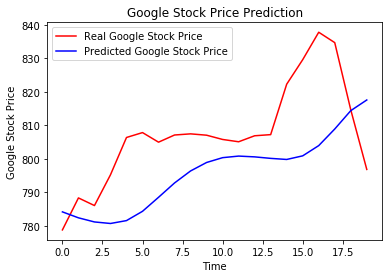

In [29]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()